## Dataset

In [1]:
from sklearn.datasets import make_classification, make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X, y = make_classification(n_features=2, n_informative=2, n_redundant=0,
                           n_classes=3, n_clusters_per_class=1, class_sep=4,
                           random_state=100, shuffle=False)

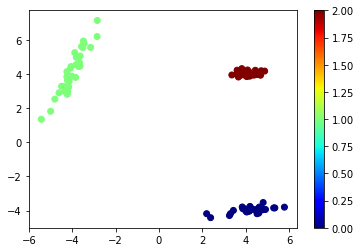

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.jet)
plt.colorbar()
plt.show()

In [5]:
X, y = make_blobs(n_samples=[25]*20, n_features=2)

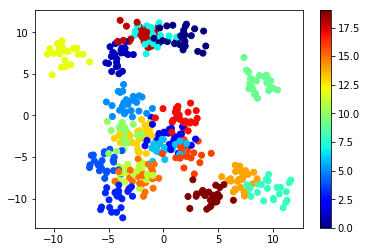

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.jet)
plt.colorbar()
plt.show()

## Results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import json

In [2]:
with open('results/toy-fcn4.json', 'r') as f:
    results = json.load(f)

In [3]:
baseline_results = results['baseline']
ensemble_results = results['ensemble']
vbranch_results = results['vbranch']

In [4]:
def plot_baseline():
    # Make data
    X = [100, 200, 400]
    Y = [100]
    X_mesh, Y_mesh = np.meshgrid(X, Y)

    Z = np.zeros((len(Y), len(X)))
    for i in range(len(X)):
        for j in range(len(Y)):
            num_classes = X[i]
            samples_per_class = Y[j]
            
            Z[j, i] = baseline_results[str(num_classes)]\
                [str(samples_per_class)][0]
            
    fig = plt.figure(figsize=(10,6))
    ax = fig.gca(projection='3d')

    # Plot the surface.
    surf = ax.plot_surface(X_mesh, Y_mesh, Z, cmap=plt.cm.coolwarm, 
                           linewidth=0, antialiased=False)

    ax.set_xlabel('Classes')
    ax.set_ylabel('Samples per class')
    ax.set_zlabel('Accuracy')

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()

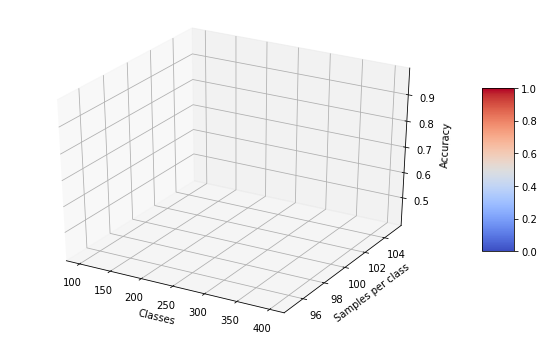

In [5]:
plot_baseline()

In [6]:
def plot_ensemble():
    # Make data
    X = [100, 200, 400] # Number of classes
    Y = np.arange(2, 7) # Number of models in ensemble
    X_mesh, Y_mesh = np.meshgrid(X, Y)

    Z = np.zeros((len(Y), len(X)))
    for i in range(len(X)):
        for j in range(len(Y)):
            num_classes = X[i]
            num_models = Y[j]
                
            # Use samples_per_class=100 as default
            Z[j, i] = ensemble_results[str(num_classes)]\
                ['100'][str(num_models)][0]
            
    fig = plt.figure(figsize=(10,6))
    ax = fig.gca(projection='3d')

    # Plot the surface.
    surf = ax.plot_surface(X_mesh, Y_mesh, Z, cmap=plt.cm.coolwarm, 
                           linewidth=0, antialiased=False)

    ax.set_xlabel('Classes')
    ax.set_ylabel('Ensemble size')
    ax.set_zlabel('Accuracy')

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()

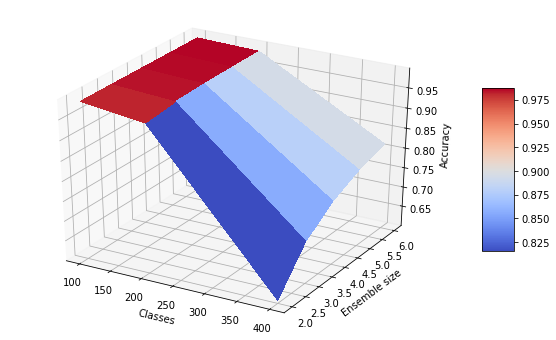

In [7]:
plot_ensemble()

In [8]:
def plot_vbranch(branches):
    # Make data
    X = [100, 200, 400] # Number of classes
    Y = [0, 0.25, 0.5, 0.75, 1] # Number of models in ensemble
    X_mesh, Y_mesh = np.meshgrid(X, Y)

    Z = np.zeros((len(Y), len(X)))
    for i in range(len(X)):
        for j in range(len(Y)):
            num_classes = X[i]
            shared_frac = Y[j]
                
            # Use samples_per_class=100 as default
            Z[j, i] = vbranch_results[str(num_classes)]['100']\
                [str(branches)][str(shared_frac)][0]
            
    fig = plt.figure(figsize=(10,6))
    ax = fig.gca(projection='3d')

    # Plot the surface.
    surf = ax.plot_surface(X_mesh, Y_mesh, Z, cmap=plt.cm.coolwarm, 
                           linewidth=0, antialiased=False)
    
    plt.title('Branches: ' + str(branches))
    ax.set_xlabel('Classes')
    ax.set_ylabel('Shared frac')
    ax.set_zlabel('Accuracy')

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()

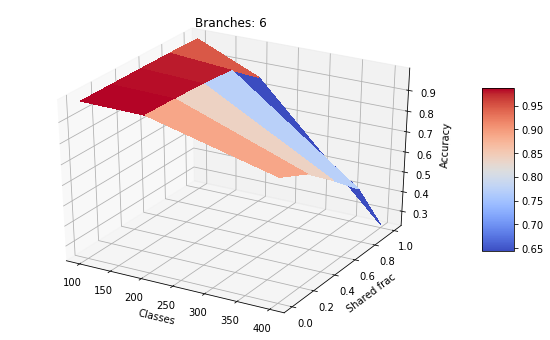

In [9]:
plot_vbranch(6)

In [10]:
def plot_versus(num_classes, branches, samples_per_class=100):
    baseline_acc = baseline_results[str(num_classes)][str(samples_per_class)][0]
    ensemble_acc = ensemble_results[str(num_classes)][str(samples_per_class)]\
        [str(branches)][0]
    
    shared_frac = [0, 0.25, 0.5, 0.75, 1]
    vbranch_acc = []
    vbranch_std = []
    
    for s in shared_frac:
        acc, std = vbranch_results[str(num_classes)][str(samples_per_class)]\
            [str(branches)][str(s)]
        vbranch_acc.append(acc)
        vbranch_std.append(std)
        
    plt.plot(shared_frac, vbranch_acc, label='vbranch', color='blue')
    trials = 4
    error = np.array(vbranch_std) / np.sqrt(trials)
    plt.errorbar(shared_frac, vbranch_acc, error*2)

    plt.plot(shared_frac, [ensemble_acc]*len(shared_frac), 
             label='ensemble', linestyle='--')
    plt.plot(shared_frac, [baseline_acc]*len(shared_frac), 
             label='baseline', linestyle='--')

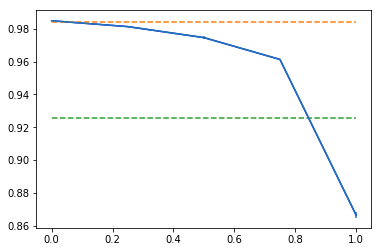

In [13]:
plot_versus(200, 5, samples_per_class=100)